**1. Importing the dependencies**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

**2. Data Loading and Understanding**

In [ ]:
# load the csv data to a pandas dataframe
df = pd.read_csv("Telco Customer Churn.csv")

In [ ]:
df.shape

(7043, 21)

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# dropping customerID column as this is not required for modelling
df = df.drop(columns=["customerID"])

In [ ]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [ ]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
# printing the unique values in all the columns

numerical_features_list = ["tenure", "MonthlyCharges", "TotalCharges"]

for col in df.columns:
  if col not in numerical_features_list:
    print(col, df[col].unique())
    print("-"*50)

gender ['Female' 'Male']
--------------------------------------------------
SeniorCitizen [0 1]
--------------------------------------------------
Partner ['Yes' 'No']
--------------------------------------------------
Dependents ['No' 'Yes']
--------------------------------------------------
PhoneService ['No' 'Yes']
--------------------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
--------------------------------------------------
OnlineBackup ['Yes' 'No' 'No internet service']
--------------------------------------------------
DeviceProtection ['No' 'Yes' 'No internet service']
--------------------------------------------------
TechSupport ['No' 'Yes' 'No internet service']
--------------------------------------------------
StreamingTV ['No' 'Yes' 'No internet 

### Numerical Elements Analysis - HISTOGRAM

In [ ]:
def plot_histogram(df, column_name):

  plt.figure(figsize=(5, 3))
  sns.histplot(df[column_name], kde=True)
  plt.title(f"Distribution of {column_name}")

  # calculate the mean and median values for the columns
  col_mean = df[column_name].mean()
  col_median = df[column_name].median()

  # add vertical lines for mean and median
  plt.axvline(col_mean, color="red", linestyle="--", label="Mean")
  plt.axvline(col_median, color="green", linestyle="-", label="Median")

  plt.legend()

  plt.show()


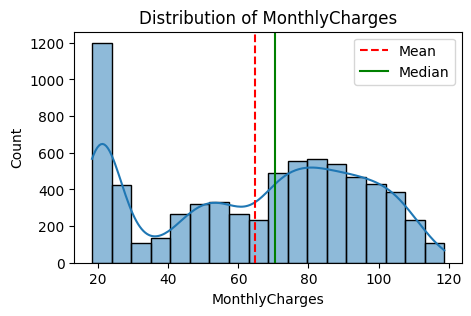

In [ ]:
plot_histogram(df, "MonthlyCharges")

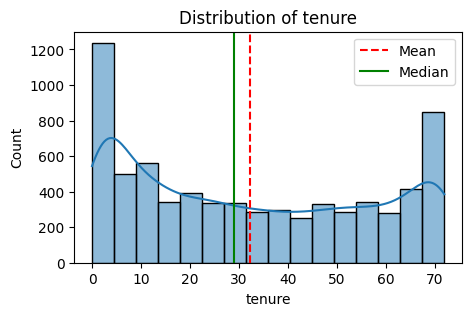

In [ ]:
plot_histogram(df, "tenure")

### NUMERICAL ELEMENTS ANALYSIS - BOXPLOTS

In [ ]:
def plot_boxplot(df, column_name):

  plt.figure(figsize=(5, 3))
  sns.boxplot(y=df[column_name])
  plt.title(f"Box Plot of {column_name}")
  plt.ylabel(column_name)
  plt.show

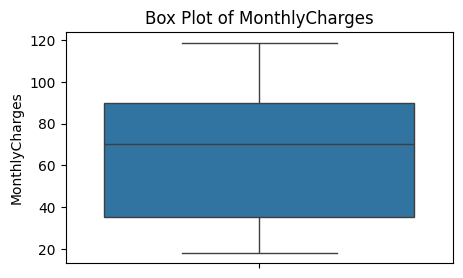

In [ ]:
plot_boxplot(df, "MonthlyCharges")

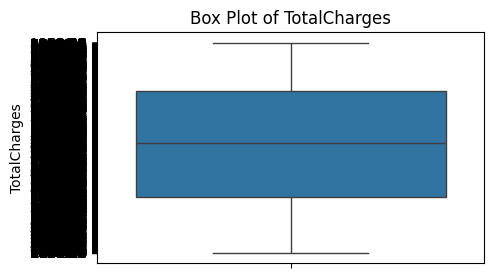

In [ ]:
plot_boxplot(df, "TotalCharges")

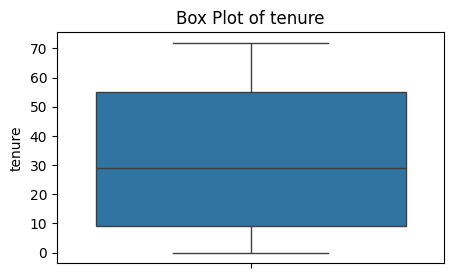

In [ ]:
plot_boxplot(df, "tenure")

### CATEGORICAL ELEMENTS ANALYSIS - COUNTPLOT

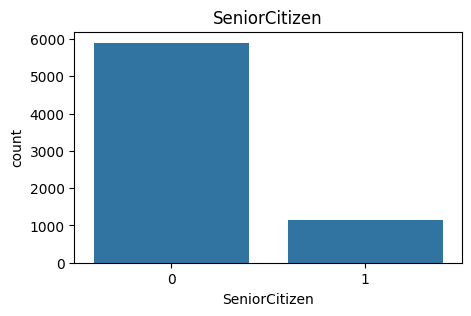

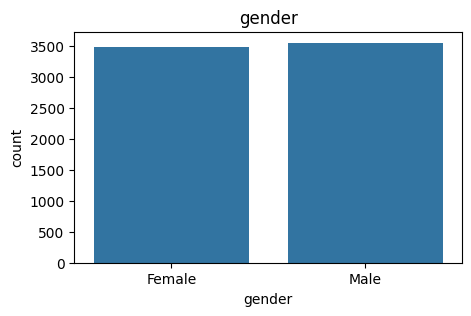

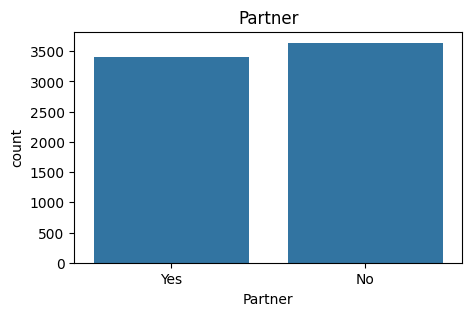

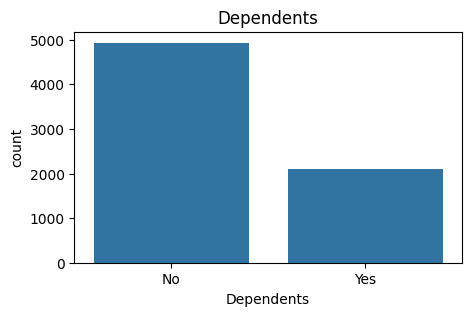

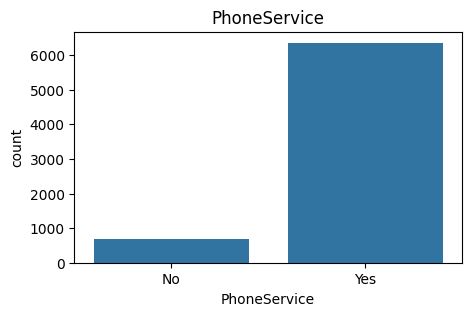

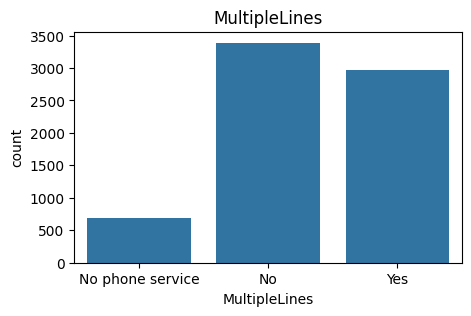

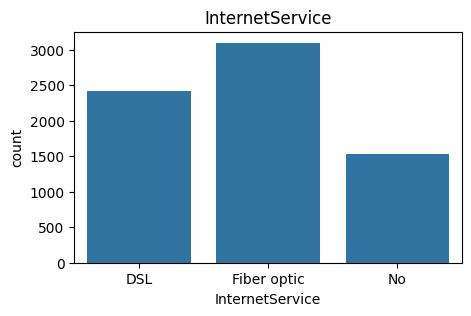

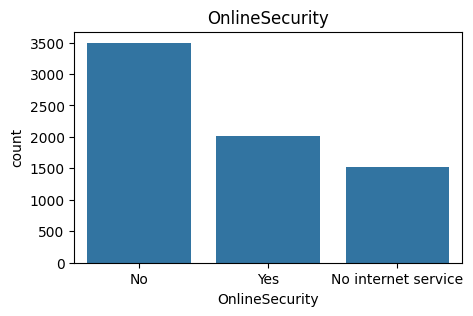

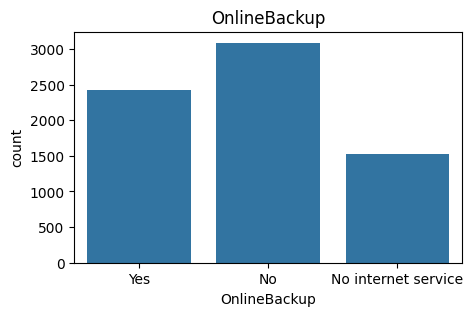

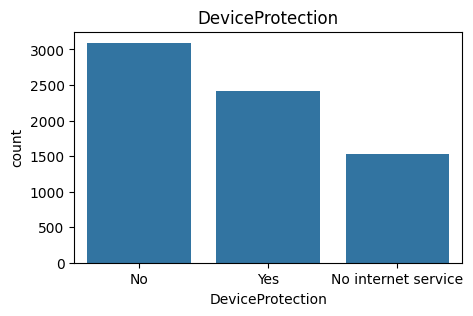

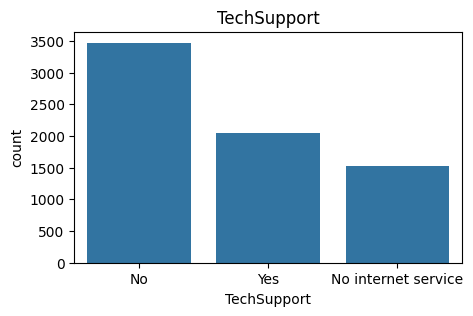

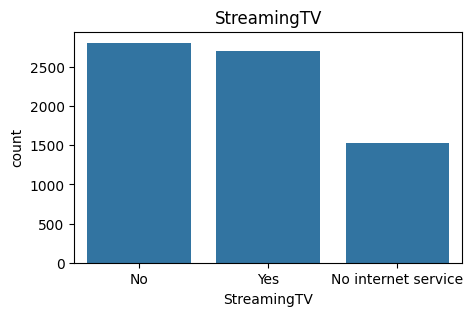

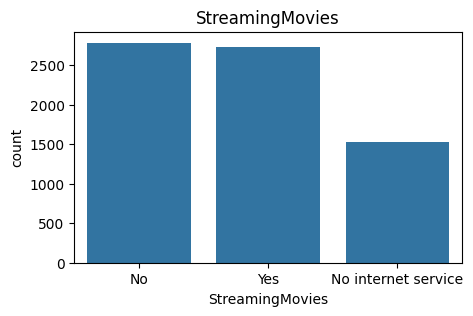

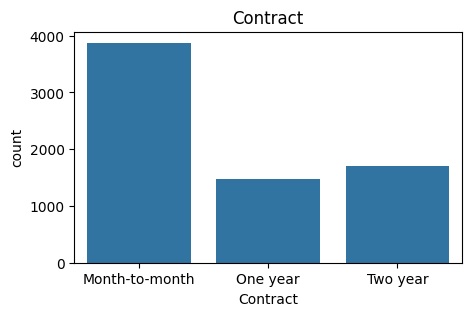

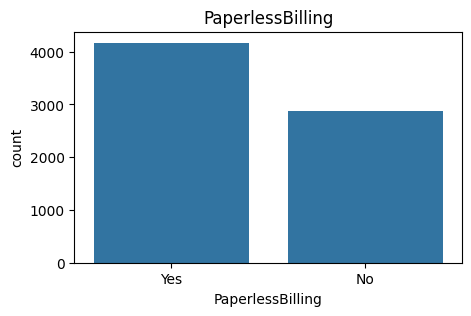

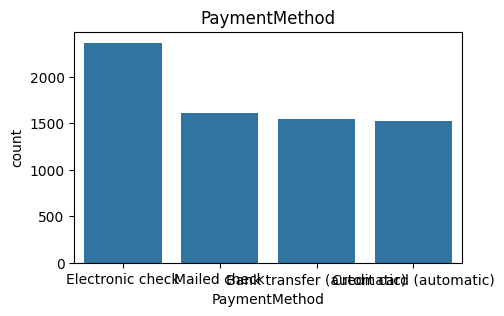

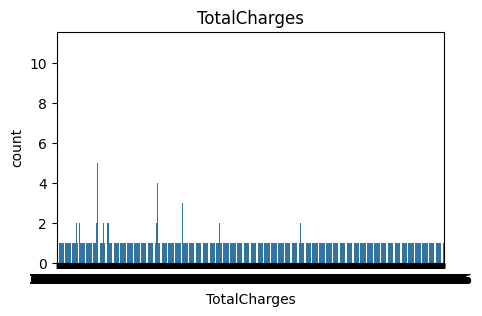

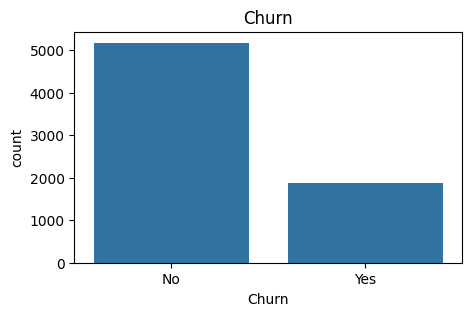

In [ ]:
object_cols = df.select_dtypes(include="object").columns.to_list()

object_cols = ["SeniorCitizen"] + object_cols

for col in object_cols:
  plt.figure(figsize=(5, 3))
  sns.countplot(x=df[col])
  plt.title(f"{col}")
  plt.show()

## DATA ANALYSIS

In [ ]:
import pandas as pd

# Load & clean dataset
df = pd.read_csv("Telco Customer Churn.csv")
df["TotalCharges"] = df["TotalCharges"].replace(" ", "0").astype(float)
df.drop(columns=["customerID"], inplace=True)

# Calculate mode values for each feature, for stayed and churned groups
modes = {}
for col in df.columns.drop("Churn"):
    stay_mode = df[df["Churn"] == "No"][col].mode()[0]
    churn_mode = df[df["Churn"] == "Yes"][col].mode()[0]
    modes[col] = {"Stay": stay_mode, "Churn": churn_mode}

# Create summary DataFrame
profile_df = pd.DataFrame.from_dict(modes, orient='index')
profile_df.index.name = "Feature"
profile_df.reset_index(inplace=True)

# Display result
print(profile_df.to_string(index=False))


         Feature           Stay            Churn
          gender           Male           Female
   SeniorCitizen              0                0
         Partner            Yes               No
      Dependents             No               No
          tenure             72                1
    PhoneService            Yes              Yes
   MultipleLines             No              Yes
 InternetService            DSL      Fiber optic
  OnlineSecurity             No               No
    OnlineBackup            Yes               No
DeviceProtection             No               No
     TechSupport             No               No
     StreamingTV            Yes               No
 StreamingMovies            Yes               No
        Contract Month-to-month   Month-to-month
PaperlessBilling            Yes              Yes
   PaymentMethod   Mailed check Electronic check
  MonthlyCharges          20.05             74.4
    TotalCharges            0.0             20.2


<ipython-input-102-063a857c7531>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=not_churned, x=col, order=not_churned[col].value_counts().index, palette="crest")
<ipython-input-102-063a857c7531>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=not_churned, x=col, order=not_churned[col].value_counts().index, palette="crest")
<ipython-input-102-063a857c7531>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=not_churned, x=col, order=not_churned[col].value_counts().index, palette="crest")
<ipython-input-102-063a857c7531

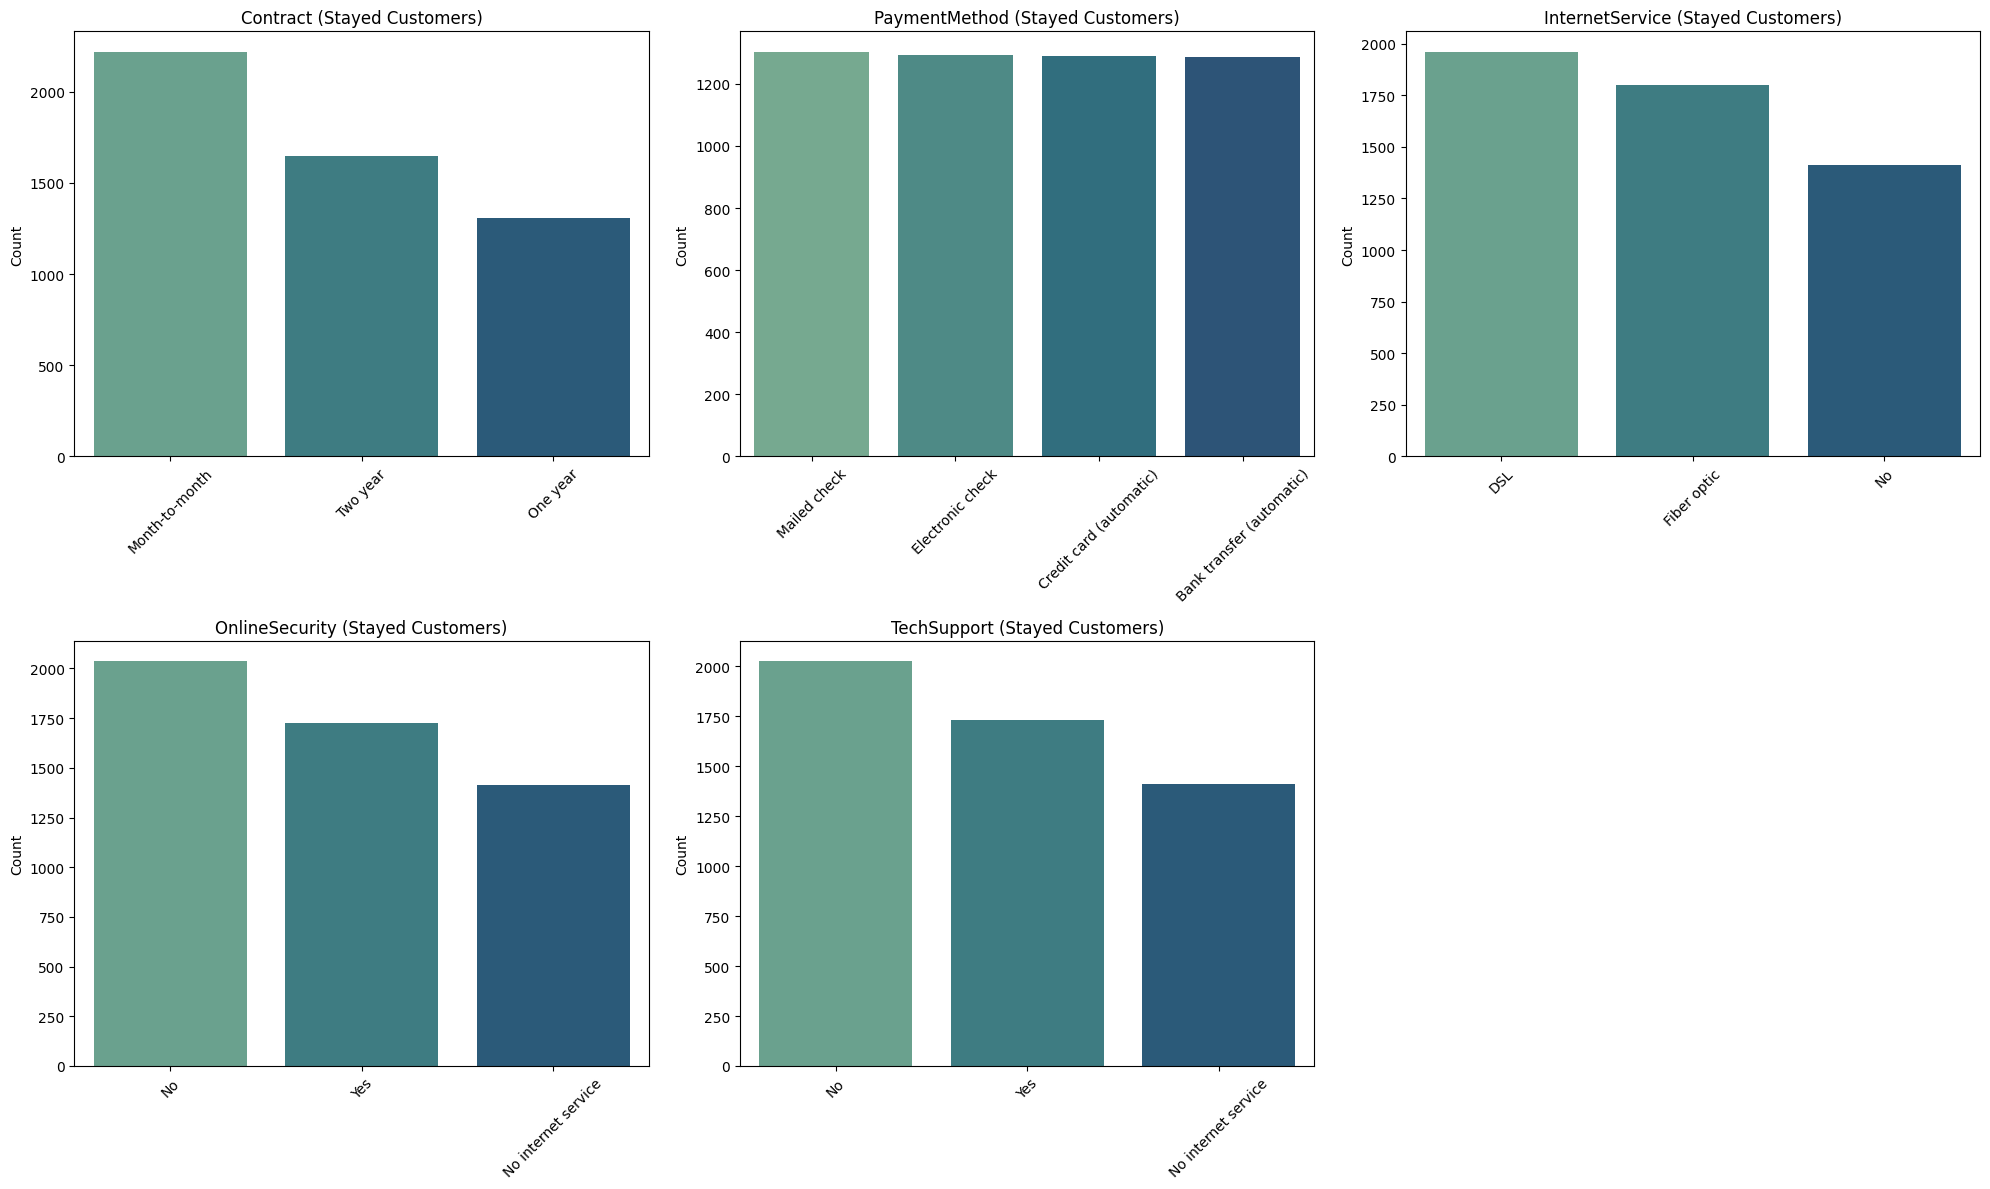

In [ ]:
# Load dataset
df = pd.read_csv("Telco Customer Churn.csv")

# Clean TotalCharges and drop ID
df["TotalCharges"] = df["TotalCharges"].replace(" ", "0").astype(float)
df.drop(columns=["customerID"], inplace=True)

# Filter customers who stayed
not_churned = df[df["Churn"] == "No"]

# Categorical columns to plot
cat_cols = ["Contract", "PaymentMethod", "InternetService", "OnlineSecurity", "TechSupport"]

# Plot charts
plt.figure(figsize=(20, 12))
for i, col in enumerate(cat_cols):
    plt.subplot(2, 3, i + 1)
    sns.countplot(data=not_churned, x=col, order=not_churned[col].value_counts().index, palette="crest")
    plt.title(f"{col} (Stayed Customers)")
    plt.xticks(rotation=45)
    plt.ylabel("Count")
    plt.xlabel("")
plt.tight_layout()
plt.show()


<ipython-input-103-68d4f108ca42>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=churned, x=col, order=churned[col].value_counts().index, palette="flare")
<ipython-input-103-68d4f108ca42>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=churned, x=col, order=churned[col].value_counts().index, palette="flare")
<ipython-input-103-68d4f108ca42>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=churned, x=col, order=churned[col].value_counts().index, palette="flare")
<ipython-input-103-68d4f108ca42>:10: FutureWarning: 

P

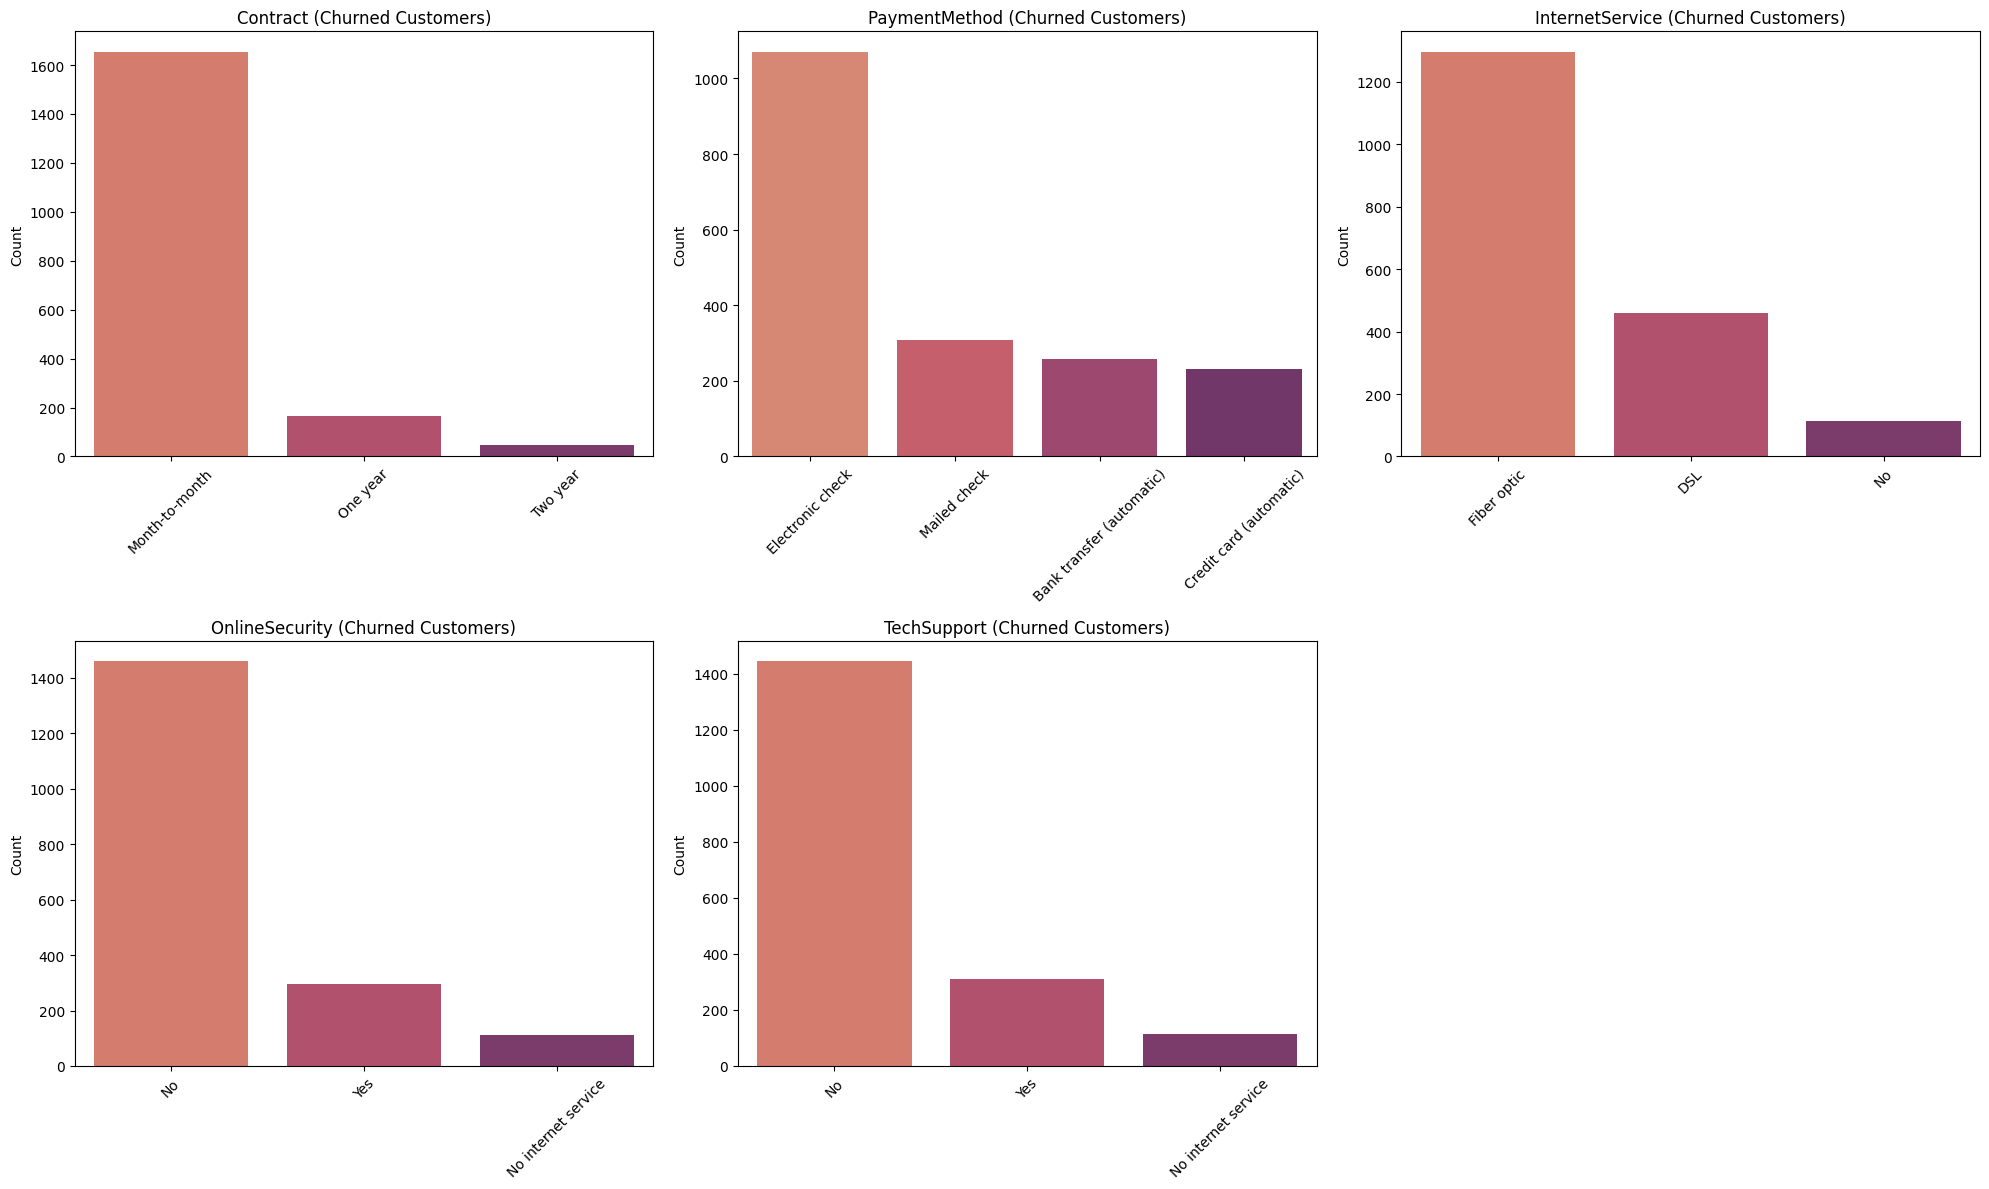

In [ ]:
# Load dataset
df = pd.read_csv("Telco Customer Churn.csv")
# Filter customers who churned
churned = df[df["Churn"] == "Yes"]

# Plot same features for churned customers
plt.figure(figsize=(20, 12))
for i, col in enumerate(cat_cols):
    plt.subplot(2, 3, i + 1)
    sns.countplot(data=churned, x=col, order=churned[col].value_counts().index, palette="flare")
    plt.title(f"{col} (Churned Customers)")
    plt.xticks(rotation=45)
    plt.ylabel("Count")
    plt.xlabel("")
plt.tight_layout()
plt.show()


In [ ]:
# Load dataset
df = pd.read_csv("Telco Customer Churn.csv")
# Clean TotalCharges and drop ID
df["TotalCharges"] = df["TotalCharges"].replace(" ", "0").astype(float)
df.drop(columns=["customerID"], inplace=True)

# Split into two groups
stayed = df[df["Churn"] == "No"]
left = df[df["Churn"] == "Yes"]

# Select categorical columns
cat_cols = df.select_dtypes(include="object").columns.drop("Churn")

# Compare features
print(" Features common in STAYED customers but rare in CHURNED customers:\n")
for col in cat_cols:
    stayed_vals = stayed[col].value_counts(normalize=True)
    left_vals = left[col].value_counts(normalize=True)

    for val in stayed_vals.index:
        stayed_pct = stayed_vals[val]
        left_pct = left_vals[val] if val in left_vals else 0

        # Difference threshold (you can tweak this)
        if stayed_pct - left_pct > 0.2:
            print(f"- {col} = '{val}' → {stayed_pct:.0%} stayed vs. {left_pct:.0%} left")

print("\n Features common in CHURNED customers but rare in STAYED customers:\n")
for col in cat_cols:
    stayed_vals = stayed[col].value_counts(normalize=True)
    left_vals = left[col].value_counts(normalize=True)

    for val in left_vals.index:
        left_pct = left_vals[val]
        stayed_pct = stayed_vals[val] if val in stayed_vals else 0

        if left_pct - stayed_pct > 0.2:
            print(f"- {col} = '{val}' → {left_pct:.0%} left vs. {stayed_pct:.0%} stayed")


 Features common in STAYED customers but rare in CHURNED customers:

- InternetService = 'No' → 27% stayed vs. 6% left
- OnlineSecurity = 'No internet service' → 27% stayed vs. 6% left
- OnlineBackup = 'No internet service' → 27% stayed vs. 6% left
- DeviceProtection = 'No internet service' → 27% stayed vs. 6% left
- TechSupport = 'No internet service' → 27% stayed vs. 6% left
- StreamingTV = 'No internet service' → 27% stayed vs. 6% left
- StreamingMovies = 'No internet service' → 27% stayed vs. 6% left
- Contract = 'Two year' → 32% stayed vs. 3% left
- PaperlessBilling = 'No' → 46% stayed vs. 25% left

 Features common in CHURNED customers but rare in STAYED customers:

- InternetService = 'Fiber optic' → 69% left vs. 35% stayed
- OnlineSecurity = 'No' → 78% left vs. 39% stayed
- OnlineBackup = 'No' → 66% left vs. 36% stayed
- DeviceProtection = 'No' → 65% left vs. 36% stayed
- TechSupport = 'No' → 77% left vs. 39% stayed
- Contract = 'Month-to-month' → 89% left vs. 43% stayed
- Pape

In [ ]:
#COMPARIN MONTHLY CHARGE OF CUSTOMER WHO CHURN AND STAY
import pandas as pd

# Load dataset
df = pd.read_csv("Telco Customer Churn.csv")

# Clean TotalCharges and drop customerID
df["TotalCharges"] = df["TotalCharges"].replace(" ", "0").astype(float)
df.drop(columns=["customerID"], inplace=True)

# Split into stayed and left groups
stayed = df[df["Churn"] == "No"]
left = df[df["Churn"] == "Yes"]

# Get bill stats
stayed_stats = stayed["MonthlyCharges"].describe()[["min", "50%", "max"]]
left_stats = left["MonthlyCharges"].describe()[["min", "50%", "max"]]

# Create summary DataFrame
summary = pd.DataFrame({
    "Customer Status": ["Stayed", "Churned"],
    "Min Monthly Bill ($)": [stayed_stats["min"], left_stats["min"]],
    "Median Monthly Bill ($)": [stayed_stats["50%"], left_stats["50%"]],
    "Max Monthly Bill ($)": [stayed_stats["max"], left_stats["max"]],
})

# Display result
summary


,Customer Status,Min Monthly Bill ($),Median Monthly Bill ($),Max Monthly Bill ($)
0,Stayed,18.25,64.425,118.75
1,Churned,18.85,79.650,118.35


In [ ]:
#COMPARING TOTAL CHARGES OF CUSTOMER WHO CHURN AND STAY
import pandas as pd

# Load dataset
df = pd.read_csv("Telco Customer Churn.csv")

# Clean TotalCharges and drop customerID
df["TotalCharges"] = df["TotalCharges"].replace(" ", "0").astype(float)
df.drop(columns=["customerID"], inplace=True)

# Split into stayed and churned groups
stayed = df[df["Churn"] == "No"]
left = df[df["Churn"] == "Yes"]

# Get TotalCharges stats
stayed_stats = stayed["TotalCharges"].describe()[["min", "50%", "max"]]
left_stats = left["TotalCharges"].describe()[["min", "50%", "max"]]

# Create summary DataFrame
summary_total = pd.DataFrame({
    "Customer Status": ["Stayed", "Churned"],
    "Min Total Charges ($)": [stayed_stats["min"], left_stats["min"]],
    "Median Total Charges ($)": [stayed_stats["50%"], left_stats["50%"]],
    "Max Total Charges ($)": [stayed_stats["max"], left_stats["max"]],
})

# Display result
summary_total


,Customer Status,Min Total Charges ($),Median Total Charges ($),Max Total Charges ($)
0,Stayed,0.00,1679.525,8672.45
1,Churned,18.85,703.550,8684.80


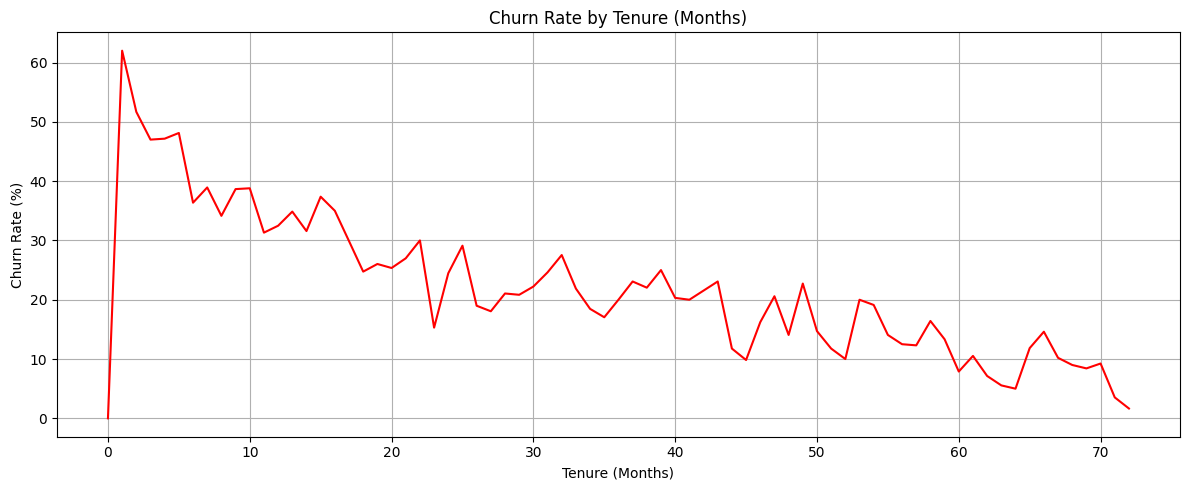

In [ ]:
#WHAT TENURE THAT CUSTOMER CHURN THE MOST
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Telco Customer Churn.csv")

# Clean TotalCharges and drop customerID
df["TotalCharges"] = df["TotalCharges"].replace(" ", "0").astype(float)
df.drop(columns=["customerID"], inplace=True)

# Convert Churn to numeric: Yes=1, No=0
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

# Group by tenure and calculate churn rate
churn_by_tenure = df.groupby("tenure")["Churn"].mean() * 100

# Plot churn rate by tenure
plt.figure(figsize=(12, 5))
sns.lineplot(x=churn_by_tenure.index, y=churn_by_tenure.values, color="red")
plt.title("Churn Rate by Tenure (Months)")
plt.xlabel("Tenure (Months)")
plt.ylabel("Churn Rate (%)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
#COMPARING CUSTOMER THAT CHURN BEFORE AND AFTER 30TH MONTH WITH CUSTOMER THAT STAY AFTER 30TH MONTH
# Group 1: Churned before 30 months
df = pd.read_csv("Telco Customer Churn.csv")
churned_before_30 = df[(df["Churn"] == "Yes") & (df["tenure"] < 30)]

# Group 2: Churned after 30 months
churned_after_30 = df[(df["Churn"] == "Yes") & (df["tenure"] >= 30)]

# Group 3: Stayed after 30 months
stayed_after_30 = df[(df["Churn"] == "No") & (df["tenure"] >= 30)]

# Define features to analyze
features = ["Contract", "PaymentMethod", "InternetService", "OnlineSecurity", "TechSupport"]

# Collect most common values across all three groups
comparison = []

for feature in features:
    before_30 = churned_before_30[feature].mode()[0] if not churned_before_30.empty else "N/A"
    after_30 = churned_after_30[feature].mode()[0] if not churned_after_30.empty else "N/A"
    stayed_30 = stayed_after_30[feature].mode()[0] if not stayed_after_30.empty else "N/A"

    comparison.append([feature, before_30, after_30, stayed_30])

# Create and display the summary DataFrame
summary_all = pd.DataFrame(comparison, columns=[
    "Feature",
    "Churned < 30 Months",
    "Churned ≥ 30 Months",
    "Stayed ≥ 30 Months"
])

summary_all


,Feature,Churned < 30 Months,Churned ≥ 30 Months,Stayed ≥ 30 Months
0,Contract,Month-to-month,Month-to-month,Two year
1,PaymentMethod,Electronic check,Electronic check,Bank transfer (automatic)
2,InternetService,Fiber optic,Fiber optic,Fiber optic
3,OnlineSecurity,No,No,Yes
4,TechSupport,No,No,Yes


In [ ]:
#WIHCH SERVICE MAKE CUSTOMER STAY
import pandas as pd

# Load dataset
df = pd.read_csv("Telco Customer Churn.csv")
df["TotalCharges"] = df["TotalCharges"].replace(" ", "0").astype(float)
df.drop(columns=["customerID"], inplace=True)

# List of services to analyze
services = ["InternetService", "OnlineSecurity", "TechSupport", "StreamingTV", "StreamingMovies", "DeviceProtection"]

# Calculate average tenure by each service option
for service in services:
    print(f"\n Average Tenure by {service}:")
    print(df.groupby(service)["tenure"].mean().sort_values(ascending=False))



 Average Tenure by InternetService:
InternetService
Fiber optic    32.917959
DSL            32.821561
No             30.547182
Name: tenure, dtype: float64

 Average Tenure by OnlineSecurity:
OnlineSecurity
Yes                    45.046558
No internet service    30.547182
No                     25.850772
Name: tenure, dtype: float64

 Average Tenure by TechSupport:
TechSupport
Yes                    44.822896
No internet service    30.547182
No                     25.844227
Name: tenure, dtype: float64

 Average Tenure by StreamingTV:
StreamingTV
Yes                    41.066125
No internet service    30.547182
No                     24.985409
Name: tenure, dtype: float64

 Average Tenure by StreamingMovies:
StreamingMovies
Yes                    41.197291
No internet service    30.547182
No                     24.712388
Name: tenure, dtype: float64

 Average Tenure by DeviceProtection:
DeviceProtection
Yes                    44.604872
No internet service    30.547182
No              

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("Telco Customer Churn.csv")

# Clean TotalCharges and drop customerID
df["TotalCharges"] = df["TotalCharges"].replace(" ", "0").astype(float)
df.drop(columns=["customerID"], inplace=True)

# Convert churn to numeric: Yes = 1, No = 0
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

# Create tenure ranges
bins = [0, 12, 24, 36, 48, 60, df["tenure"].max()]
labels = ["0–12", "13–24", "25–36", "37–48", "49–60", "60+"]

df["TenureRange"] = pd.cut(df["tenure"], bins=bins, labels=labels, right=True)

# Calculate churn rate by tenure range
churn_by_tenure = df.groupby("TenureRange")["Churn"].mean() * 100

# Display result
print(" Churn Rate by Tenure Range (%):")
print(churn_by_tenure.round(2))


 Churn Rate by Tenure Range (%):
TenureRange
0–12     47.68
13–24    28.71
25–36    21.63
37–48    19.03
49–60    14.42
60+       6.61
Name: Churn, dtype: float64


<ipython-input-110-9d7b06a403de>:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_tenure = df.groupby("TenureRange")["Churn"].mean() * 100


<ipython-input-111-ff3fc9c0f064>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_churn_customers["ActualChurn"] = y_test[y_test_pred == 0]


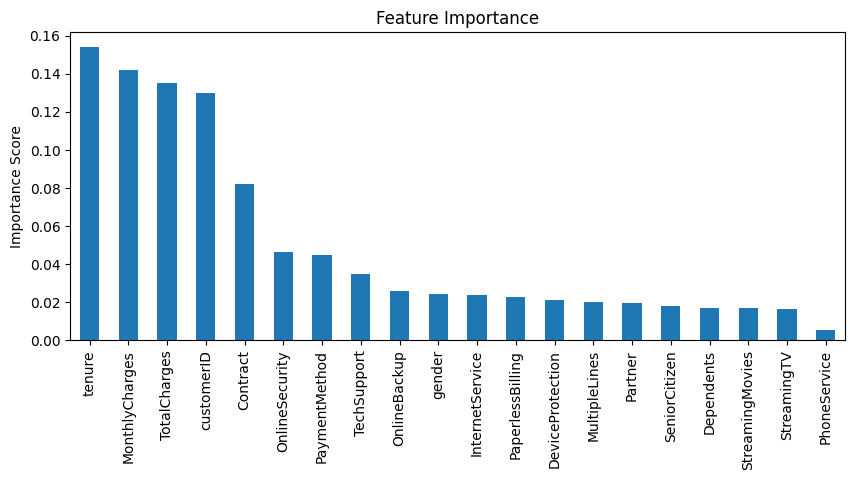

In [ ]:
#Features Importance
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import pickle

# 1. Load & clean data
df = pd.read_csv("Telco Customer Churn.csv")

# 2. Encode categoricals
encoders = {}
for col in df.select_dtypes(include="object").columns:
    if col != "Churn":
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        encoders[col] = le  # Store the encoder for this column
df["Churn"] = df["Churn"].map({"No": 0, "Yes": 1})

# 3. Split
X = df.drop("Churn", axis=1)
y = df["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 5. Save the model (this is the crucial part you were missing)
with open("customer_churn_model.pkl", "wb") as f:
    pickle.dump(model, f)


# Load the model
with open("customer_churn_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)




# 2. Get the customers predicted as "No Churn"
y_test_pred = loaded_model.predict(X_test)
no_churn_customers = X_test[y_test_pred == 0]

# 3. Combine with actual labels to inspect
no_churn_customers["ActualChurn"] = y_test[y_test_pred == 0]

# 4. Decode back categorical columns for better interpretation
decoded_customers = no_churn_customers.copy()
for column, encoder in encoders.items():
    decoded_customers[column] = encoder.inverse_transform(decoded_customers[column])

importances = pd.Series(loaded_model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 4), title="Feature Importance")
plt.ylabel("Importance Score")
plt.show()

In [ ]:
# Filter stayed customers
stayed = df[df["Churn"] == 0]

# Services to analyze
service_features = ["OnlineSecurity", "OnlineBackup", "DeviceProtection",
                    "TechSupport", "StreamingTV", "StreamingMovies", "MultipleLines"]

print(" Percentage of Stayed Customers Who Don't Use Each Service:\n")

for feature in service_features:
    counts = stayed[feature].value_counts(normalize=True)
    no_usage = counts.get("No", 0) + counts.get("No internet service", 0)
    print(f"{feature}: {(no_usage * 100):.2f}%")


 Percentage of Stayed Customers Who Don't Use Each Service:

OnlineSecurity: 0.00%
OnlineBackup: 0.00%
DeviceProtection: 0.00%
TechSupport: 0.00%
StreamingTV: 0.00%
StreamingMovies: 0.00%
MultipleLines: 0.00%


In [ ]:
import pandas as pd

# Load and clean dataset
df = pd.read_csv("Telco Customer Churn.csv")
df["TotalCharges"] = df["TotalCharges"].replace(" ", "0").astype(float)
df.drop(columns=["customerID"], inplace=True)

# Filter stayed customers
stayed = df[df["Churn"] == "No"]

# List of service-related features
service_features = [
    "PhoneService", "MultipleLines", "OnlineSecurity", "OnlineBackup",
    "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"
]

# Calculate % of "Yes" responses for each feature
popular_services_pct = {}

for feature in service_features:
    total = len(stayed)
    yes_pct = (stayed[feature].value_counts(normalize=True).get("Yes", 0)) * 100
    popular_services_pct[feature] = round(yes_pct, 2)

# Convert to DataFrame and sort
popular_pct_df = pd.DataFrame.from_dict(popular_services_pct, orient='index', columns=["% Saying Yes"])
popular_pct_df = popular_pct_df.sort_values(by="% Saying Yes", ascending=False)

# Display result
print(" Percent of Stayed Customers Who Use Each Service")
print(popular_pct_df)


 Percent of Stayed Customers Who Use Each Service
                  % Saying Yes
PhoneService             90.10
MultipleLines            40.99
StreamingMovies          36.99
OnlineBackup             36.84
StreamingTV              36.59
DeviceProtection         36.28
TechSupport              33.51
OnlineSecurity           33.32


### SMOTE



---



In [ ]:
# splitting the features and target
X = df.drop(columns=["Churn"])
y = df["Churn"]
# split training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(y_train.value_counts())

Churn
No     4138
Yes    1496
Name: count, dtype: int64


In [ ]:
!pip install imblearn

#Import the SMOTE class from imblearn.over_sampling
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Encode the categorical features in X_train before applying SMOTE
for col in X_train.select_dtypes(include=['object']).columns:
    X_train[col] = le.fit_transform(X_train[col])

# Now apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print(y_train_smote.value_counts())

Churn
No     4138
Yes    4138
Name: count, dtype: int64


### RANDOM FOREST CLASSIFIER

In [ ]:
# dictionary of models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}


In [ ]:
# dictionary to store the cross validation results
from sklearn.model_selection import cross_val_score # import the missing function
import numpy as np # import numpy for np.mean()
cv_scores = {}

# perform 5-fold cross validation for each model
for model_name, model in models.items():
  print(f"Training {model_name} with default parameters")
  scores = cross_val_score(model, X_train_smote, y_train_smote, cv=5, scoring="accuracy")
  cv_scores[model_name] = scores
  print(f"{model_name} cross-validation accuracy: {np.mean(scores):.2f}")
  print("-"*70)

Training Decision Tree with default parameters
Decision Tree cross-validation accuracy: 0.78
----------------------------------------------------------------------
Training Random Forest with default parameters
Random Forest cross-validation accuracy: 0.84
----------------------------------------------------------------------


In [ ]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train_smote, y_train_smote)
print(y_test.value_counts())

Churn
No     1036
Yes     373
Name: count, dtype: int64


In [ ]:
### MODEL PREDICTION

In [ ]:
# save the trained model as a pickle file
model_data = {"model": rfc, "features_names": X.columns.tolist()}


with open("customer_churn_model.pkl", "wb") as f:
  pickle.dump(model_data, f)

In [ ]:
# load the saved model and the feature names

with open("customer_churn_model.pkl", "rb") as f:
  model_data = pickle.load(f)

loaded_model = model_data["model"]
feature_names = model_data["features_names"]

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# 1. Load & clean data
df = pd.read_csv("Telco Customer Churn.csv")
df["TotalCharges"] = df["TotalCharges"].replace(" ", "0").astype(float)
df.drop(columns=["customerID"], inplace=True)

# 2. Load the saved model and the feature names
with open("customer_churn_model.pkl", "rb") as f:
  model_data = pickle.load(f)

loaded_model = model_data["model"]
feature_names = model_data["features_names"]

# 3. Input data
input_data = {
    'gender': 'Female',
    'SeniorCitizen': 0,
    'Partner': 'Yes',
    'Dependents': 'No',
    'tenure': 1,
    'PhoneService': 'No',
    'MultipleLines': 'No phone service',
    'InternetService': 'DSL',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'Yes',
    'DeviceProtection': 'No',
    'TechSupport': 'No',
    'StreamingTV': 'No',
    'StreamingMovies': 'No',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check',
    'MonthlyCharges': 29.85,
    'TotalCharges': 29.85
}
input_data_df = pd.DataFrame([input_data])

# 4. Encode categorical features using LabelEncoder
categorical_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                        'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                        'PaperlessBilling', 'PaymentMethod']

# Create a LabelEncoder object
le = LabelEncoder()

# Fit and transform the categorical features
for col in categorical_features:
    # Fit the encoder on training data (from original df) and transform both train and input data
    le.fit(df[col])
    input_data_df[col] = le.transform(input_data_df[col])


# 5. Make a prediction
prediction = loaded_model.predict(input_data_df)
pred_prob = loaded_model.predict_proba(input_data_df)

# 6. Results
print(f"Prediction: {'Churn' if prediction[0] == 1 else 'No Churn'}")
print(f"Prediction Probability: {pred_prob}")

Prediction: No Churn
Prediction Probability: [[0.78 0.22]]


In [ ]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=e51c0cadf2fb63f966f1196a09518d5c482c04f275afc8a963dcd7691c0e3fd5
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from lime.lime_tabular import LimeTabularExplainer

# 1. Load & clean data
df = pd.read_csv("Telco Customer Churn.csv")
df["TotalCharges"] = df["TotalCharges"].replace(" ", "0").astype(float)
df.drop(columns=["customerID"], inplace=True)

# 2. Encode categoricals
le = LabelEncoder()
for col in df.select_dtypes(include="object").columns:
    if col != "Churn":
        df[col] = le.fit_transform(df[col])
df["Churn"] = df["Churn"].map({"No": 0, "Yes": 1})

# 3. Split
X = df.drop("Churn", axis=1)
y = df["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 5. Setup LIME explainer
explainer = LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns.tolist(),
    class_names=["Stay", "Churn"],
    mode="classification"
)

# 6. Explain one test instance
i = 0  # pick an index
exp = explainer.explain_instance(
    X_test.iloc[i].values,
    model.predict_proba,
    num_features=10
)

# 7. Display
exp.show_in_notebook(show_table=True)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
